# Logistic Regression

### Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data_set = pd.read_csv("Social_Network_Ads.csv")
data_set

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [11]:
data_set.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [12]:
X = data_set.iloc[:, [2,3]].values

In [13]:
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [9]:
y = data_set.iloc[:, -1].values

In [10]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

### Splititng Into Training And Testing Test

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75)

In [16]:
print(X_train, X_test, y_train, y_test)

[[    32 150000]
 [    22  27000]
 [    53 104000]
 [    35  75000]
 [    44 139000]
 [    41  63000]
 [    51  23000]
 [    28  89000]
 [    39  96000]
 [    27  84000]
 [    35  88000]
 [    25  79000]
 [    28  87000]
 [    31  76000]
 [    30  15000]
 [    18  52000]
 [    40  78000]
 [    33 149000]
 [    57  60000]
 [    41  45000]
 [    35  72000]
 [    49  39000]
 [    37  80000]
 [    27  88000]
 [    44  39000]
 [    47  34000]
 [    60 108000]
 [    31  15000]
 [    43 133000]
 [    57 122000]
 [    32 120000]
 [    21  68000]
 [    26  80000]
 [    19  19000]
 [    59  83000]
 [    40  71000]
 [    56 104000]
 [    20  23000]
 [    57  33000]
 [    37  80000]
 [    48  33000]
 [    47  20000]
 [    25  90000]
 [    59  42000]
 [    35  27000]
 [    47  49000]
 [    47 105000]
 [    27  58000]
 [    28 123000]
 [    59  76000]
 [    48  74000]
 [    46  28000]
 [    46  96000]
 [    26  86000]
 [    36  54000]
 [    23  82000]
 [    37  77000]
 [    26  16000]
 [    35  2300

### Feature Scalling

In [18]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train) 
X_test = sc_X.fit_transform(X_test)   #sc_X.transform(X_test)

In [19]:
X_train

array([[-0.52190473,  2.29361465],
       [-1.42485408, -1.24935172],
       [ 1.37428891,  0.96860284],
       [-0.25101992,  0.1332693 ],
       [ 0.5616345 ,  1.976764  ],
       [ 0.29074969, -0.21238595],
       [ 1.19369904, -1.36457014],
       [-0.88308447,  0.53653377],
       [ 0.11015982,  0.738166  ],
       [-0.9733794 ,  0.39251075],
       [-0.25101992,  0.50772916],
       [-1.15396927,  0.24848772],
       [-0.88308447,  0.47892456],
       [-0.61219966,  0.16207391],
       [-0.7024946 , -1.59500697],
       [-1.78603382, -0.5292366 ],
       [ 0.20045476,  0.21968312],
       [-0.43160979,  2.26481005],
       [ 1.73546866, -0.29879977],
       [ 0.29074969, -0.73086883],
       [-0.25101992,  0.04685549],
       [ 1.01310917, -0.90369646],
       [-0.07043005,  0.27729233],
       [-0.9733794 ,  0.50772916],
       [ 0.5616345 , -0.90369646],
       [ 0.8325193 , -1.04771949],
       [ 2.00635346,  1.08382126],
       [-0.61219966, -1.59500697],
       [ 0.47133956,

In [20]:
X_test

array([[-0.27188827,  0.22406556],
       [-0.03338979, -1.09212372],
       [-0.27188827, -1.49951564],
       [-1.58362994, -0.30867772],
       [-0.27188827, -0.24600204],
       [-0.39113751,  1.47757916],
       [-1.58362994, -0.40269124],
       [-1.34513145, -1.02944804],
       [-0.27188827, -0.55938044],
       [ 1.15910264, -1.34282644],
       [-0.27188827, -0.46536692],
       [ 0.32435794, -0.34001556],
       [ 1.03985339,  0.44343044],
       [ 1.39760112, -1.24881292],
       [ 0.08585945,  1.41490348],
       [ 0.44360718, -0.49670476],
       [-1.10663297, -0.27733988],
       [-1.10663297, -0.74740748],
       [-0.15263903,  1.8222954 ],
       [ 0.44360718, -0.27733988],
       [-0.39113751,  1.38356564],
       [ 1.27835188,  0.8821602 ],
       [-0.15263903, -0.49670476],
       [ 0.44360718,  0.0987142 ],
       [-0.27188827, -0.30867772],
       [ 0.08585945,  0.38075476],
       [-0.51038676,  1.41490348],
       [ 1.51685036,  0.63145748],
       [-0.27188827,

### Fitting Logistic Regression To Traing Data Set

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Predicting

In [24]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [25]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

### Making Confusion Matrix

In [28]:
from sklearn.metrics import confusion_matrix

In [32]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[58  8]
 [ 8 26]]


### Visualizing Training Set

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


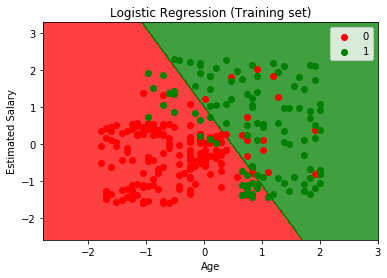

In [30]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualizing Test Set

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


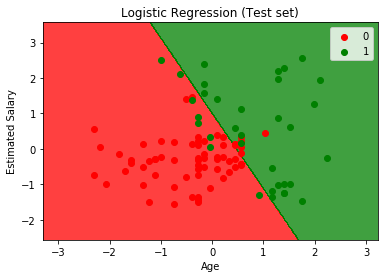

In [31]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# END